In [10]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from LoadMultiFiles import LoadMultiFiles
from ReweightSamples import GetReweightSamples

uniform_samples = False
if uniform_samples:
    name_files = "/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep/predict_*.npz"
else:
    name_files = "/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep_neutron_0_0_0/predict_*.npz"
dir_evts = LoadMultiFiles(name_files)

Loaded Data Keys:	 dict_keys(['equen', 'edep', 'pdg', 'init_p', 'vertex', 'pdg_pdgdep', 'equen_pdgdep', 'edep_pdgdep', 'PSD', 'h_time', 'PSD_with_charge', 'h_time_with_charge', 'name_file_source', 'entry_source', 'h_time_truth', 'h_time_with_charge_truth', 'lepton_ratio'])


In [11]:
# dir_evts["lepton_ratio"][dir_evts["lepton_ratio"]<0] = 0
index_lepton_ratio_filter = (dir_evts["lepton_ratio"]>=0)
for key in dir_evts.keys():
    if len(dir_evts[key])==0:
        continue
    dir_evts[key] = dir_evts[key][index_lepton_ratio_filter]


In [12]:
# plt.hist(dir_evts["lepton_ratio"], bins=np.concatenate((np.linspace(0,0.1,10), 
#                                                         np.linspace(0.1, 1, 20))))

In [13]:
# import random
# h_lepton_ratio, h_edges = np.histogram(dir_evts["lepton_ratio"], bins=100)
# total_n_samples_to_select = h_lepton_ratio[0]
# n_samples_to_select = np.mean(h_lepton_ratio[1:])
# ratio_abort = 1 - n_samples_to_select/total_n_samples_to_select
# index_need_to_select = np.where(dir_evts["lepton_ratio"]<=h_edges[1])[0]
# index_abort = random.sample(list(index_need_to_select), int(len(index_need_to_select)*ratio_abort))
# index_remain = np.array([True]*len(dir_evts["lepton_ratio"]))
# index_remain[index_abort] = False
# for key in dir_evts.keys():
#     if key == "edep":
#         continue
#     dir_evts[key] = np.array(dir_evts[key])[index_remain]

405.0


Text(0.5, 1.0, 'Lepton Ratio ( After Reweighting ) ')

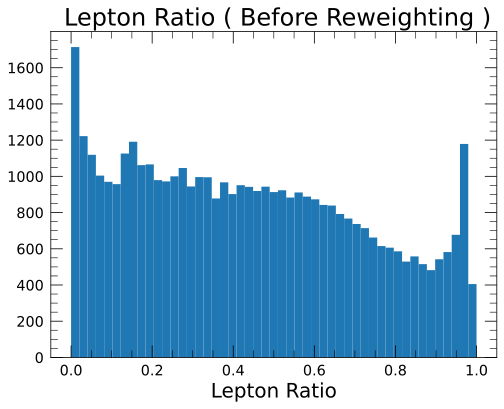

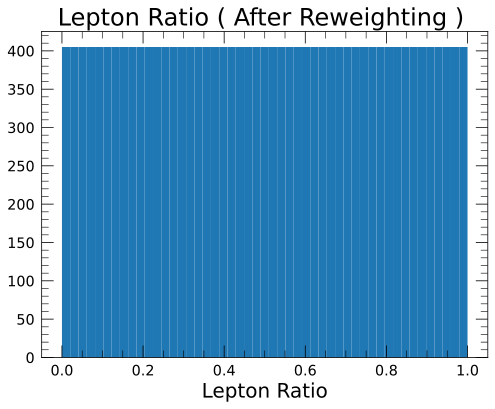

In [14]:
plt.figure()
bins = np.linspace(0, 1,50)
h = plt.hist(dir_evts["lepton_ratio"], bins=bins)
plt.xlabel("Lepton Ratio")
plt.title(" Lepton Ratio ( Before Reweighting )")
print(np.min(h[0]))

index_number_select = GetReweightSamples(dir_evts["lepton_ratio"], h[0], h[1], np.ones(len(h[0])))

plt.figure()
plt.hist(dir_evts["lepton_ratio"][index_number_select], bins=bins)
plt.xlabel("Lepton Ratio")
plt.title("Lepton Ratio ( After Reweighting ) ")


In [15]:
import random
print(index_number_select)
random.shuffle(index_number_select)
print(index_number_select)

[15038, 24385, 2075, 24807, 36912, 19545, 3833, 18439, 24045, 16501, 22287, 22517, 1296, 40971, 17707, 3934, 13570, 27561, 18881, 28600, 7162, 31450, 31763, 20796, 32969, 12407, 14329, 11984, 25610, 38629, 17666, 38575, 37377, 20238, 39822, 19626, 39529, 11665, 14225, 39918, 28999, 24510, 13708, 5584, 7201, 16879, 38335, 39471, 23382, 17597, 29708, 26444, 17316, 26874, 2405, 10440, 22392, 26598, 25005, 28405, 36284, 34779, 19329, 12694, 8593, 33759, 21945, 39101, 28892, 34582, 38700, 15910, 18904, 38441, 31623, 19047, 35981, 26646, 22254, 36144, 41904, 5762, 10382, 8480, 17623, 23995, 29420, 34082, 26215, 10725, 19804, 26573, 10304, 2348, 1876, 5236, 23164, 3543, 27573, 8167, 11559, 5447, 17313, 16255, 3841, 40085, 12798, 12845, 35126, 8838, 4668, 24144, 11180, 2664, 12689, 28102, 18628, 13448, 22341, 34098, 28788, 23265, 34936, 16206, 15306, 29511, 25376, 10707, 3557, 852, 8140, 29202, 8908, 28183, 38359, 37653, 38521, 14877, 10212, 17914, 35181, 21112, 5660, 41137, 23364, 26217, 3973

(array([2002., 1939., 1967., 1962., 1957., 1971., 1964., 1963., 1955.,
        2165.]),
 array([0.00160219, 0.10044734, 0.19929249, 0.29813765, 0.3969828 ,
        0.49582795, 0.59467311, 0.69351826, 0.79236341, 0.89120856,
        0.99005372]),
 <BarContainer object of 10 artists>)

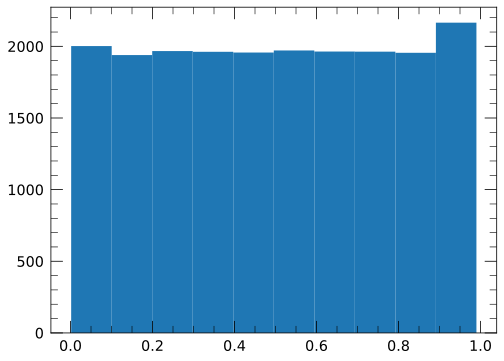

In [16]:

dir_save = {}
for key in dir_evts.keys():
    if len(dir_evts[key])==0:
        continue
    dir_save[key] = dir_evts[key][index_number_select]
plt.hist(dir_save["lepton_ratio"])

In [17]:
# np.savez("")
import os
dir_name = os.path.dirname(name_files)
print(dir_name)
if uniform_samples:
    np.savez(f"{dir_name}/uniform_predict.npz", dir_events=dir_save)
else:
    np.savez(f"{dir_name}/center_predict.npz", dir_events=dir_save)


/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/predict_withpdgdep_neutron_0_0_0


In [18]:
print(len(dir_save["PSD"]))

19845
